In [1]:
# check whether output metrics show the pareto frontiers

In [16]:
import os, sys, subprocess, pickle, toml
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt

# import MO-ASMO functions
# path_MOASMO = '/glade/u/home/guoqiang/model_sources/MO-ASMO/src'
path_MOASMO = '/glade/u/home/guoqiang/CTSM_repos/ctsm_optz/MO-ASMO/src/'
sys.path.append(path_MOASMO)

sys.path.append('../MOASMO_support/')
from MOASMO_parameters import *
import run_multiple_paramsets_Derecho


def get_metrics(target):
    # evaluation results
    file_metric_all = []
    file_param_all = []
    iter_end = 1
    num_init = 400
    num_per_iter = 20
    path_archive = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{target}_MOASMOcalib/ctsm_outputs'
    
    for it in range(0, iter_end):
        print('#'*50)
        print(f'Start iterattion {it}')
        
    
        iterflag = it
    
        if it == 0:
            sample_num = num_init
        else:
            sample_num = num_per_iter
    
        file_metric_iter, file_param_iter = run_multiple_paramsets_Derecho.check_if_all_runs_are_finsihed(path_archive, iterflag, sample_num)
        file_metric_all.append(file_metric_iter)
        file_param_all.append(file_param_iter)

    
    param_filelist = file_param_all
    metric_filelist = file_metric_all
    
    configfile = f'/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO/configuration/_level1-{target}_config_MOASMO.toml'
    config = toml.load(configfile)
    param_infofile = config['file_calib_param']
    
    outpath = '/glade/derecho/scratch/guoqiang'
    
    iterflag = 0
    
    
    n_sample = 20 # number of selected optimal points
    
    # input data x (parameter sets) and output data y (objective function values)
    df_param = pd.concat(map(pd.read_csv, param_filelist))
    df_metric = pd.concat(map(pd.read_csv, metric_filelist))
    df_info = read_parameter_csv(param_infofile)
    
    param_names = df_info['Parameter'].values # exclude binded parameters
    df_param = df_param[param_names]
    
    xlb_mean = np.array([np.nanmean(v) for v in df_info['Lower']])
    xub_mean = np.array([np.nanmean(v) for v in df_info['Upper']])
    
    x = df_param.to_numpy()
    y = df_metric.to_numpy()
    
    ind = ~np.isnan( np.sum(x,axis=1) + np.sum(y,axis=1))
    x, y = x[ind, :], y[ind, :]

    return y

In [28]:
def calculate_and_plot_two_metrics(targets, sp1=3, sp2=4):
    fig = plt.figure(figsize=[10, 6])

    flag = 1
    for target in targets:
        y = get_metrics(target)
    
        fig.add_subplot(sp1,sp2,flag)
        plt.scatter(y[:,0], y[:,1], 4)
        plt.xlabel('metric 1')
        plt.ylabel('metric 2')
        plt.title(f'basin {target}')
    
        flag = flag + 1
    
    plt.tight_layout()    
    plt.show()

def remove_previous_metrics(flag, targets):
    if flag==True:
        iterflag = 0

        for target in targets:
            path_archive = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{target}_MOASMOcalib/ctsm_outputs'
            outfile_metric = f'{path_archive}/iter{iterflag}_all_metric.csv'
            os.system(f'rm {outfile_metric}')
            
            files = f'{path_archive}/iter{iterflag}_trial*/evaluation_metric.csv'
            os.system(f'rm {files}')




In [31]:
# plot 2 metrics
targets = np.arange(10)
remove_previous_metrics(flag=True, targets=targets)
calculate_and_plot_two_metrics(targets, sp1=3, sp2=4)

##################################################
Start iterattion 0


FileNotFoundError: [Errno 2] No such file or directory: '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_0_MOASMOcalib/ctsm_outputs/iter0_trial0/evaluation_metric.csv'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot 2 metrics from the iterations
targets = np.arange(10)

fig = plt.figure(figsize=[10, 6])

flag = 1
for target in targets:
    y = get_metrics(target)

    fig.add_subplot(3,4,flag)
    plt.scatter(y[:,0], y[:,1], 4)
    plt.xlabel('metric 1')
    plt.ylabel('metric 2')
    plt.title(f'basin {target}')

    flag = flag + 1

plt.tight_layout()    
plt.show()

In [25]:
iterflag = 0
path_archive = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{target}_MOASMOcalib/ctsm_outputs'
outfile_metric = f'{path_archive}/iter{iterflag}_all_metric.csv'
outfile_metric

'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_9_MOASMOcalib/ctsm_outputs/iter0_all_metric.csv'

##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0
##################################################
Start iterattion 0


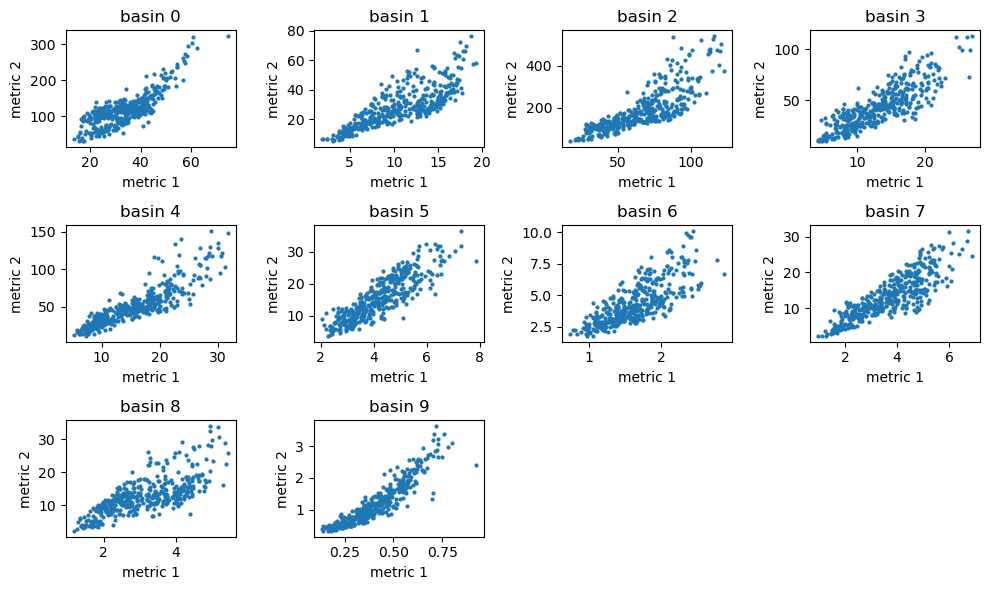

In [24]:
# plot 2 metrics from the iterations
targets = np.arange(10)

fig = plt.figure(figsize=[10, 6])

flag = 1
for target in targets:
    y = get_metrics(target)

    fig.add_subplot(3,4,flag)
    plt.scatter(y[:,0], y[:,1], 4)
    plt.xlabel('metric 1')
    plt.ylabel('metric 2')
    plt.title(f'basin {target}')

    flag = flag + 1


plt.tight_layout()    
plt.show()